# Imports

In [1]:
from fastai import *
from fastai.collab import *
from fastai.tabular import *
import seaborn as sns
sns.set()

%matplotlib inline

# Sample of movies data

`collab` models use data in a `DataFrame` of user, items, and ratings.

In [2]:
user, item, title = 'userId', 'movieId', 'title'

In [3]:
path = untar_data(URLs.ML_SAMPLE)
path

PosixPath('/home/jupyter/.fastai/data/movie_lens_sample')

In [4]:
ratings = pd.read_csv(path / 'ratings.csv')
ratings.head()

,userId,movieId,rating,timestamp
0,73,1097,4.0,1255504951
1,561,924,3.5,1172695223
2,157,260,3.5,1291598691
3,358,1210,5.0,957481884
4,130,316,2.0,1138999234


That's all we need to create and train a model:

`CollabDataBunch` assumes the first column is user, the second is movie, and the third is rating.

In [5]:
data = CollabDataBunch.from_df(ratings, seed=42)

In [6]:
# Since we are using sigmoid to restrict values to be between 0 & 5, sigmoid
# saturates at the lower and upper intervals and may not actually get a prediction
# that is 0 or 5 even though we have a lot of movies that have been rated at 5.
# Therefore, we would subtract small number for minumum and add the same number to 
# the maximum. In our case, the minumum was 0.5 and maximum was 5 --> subtract
# 0.5 form min and add 0.5 to the max --> new y_range = [0.5 - 0.05, 5 + 0.5] = [0, 5.5]
y_range = [0, 5.5]

In [7]:
# n_factors is the width of the embedding matrix
learn = collab_learner(data, n_factors=50, y_range=y_range)

In [8]:
learn.fit_one_cycle(3, 5e-3)

Total time: 00:02
epoch  train_loss  valid_loss
1      1.585587    0.937921    (00:00)
2      0.836838    0.679799    (00:00)
3      0.661621    0.675431    (00:00)



# Movielens 100k

Let's try with the full Movielens 100k data dataset, available from http://files.grouplens.org/datasets/movielens/ml-100k.zip

In [9]:
path = Path('../data/ml-100k/')
path

PosixPath('../data/ml-100k')

In [10]:
path.ls()

[PosixPath('../data/ml-100k/README'),
 PosixPath('../data/ml-100k/u4.test'),
 PosixPath('../data/ml-100k/u.genre'),
 PosixPath('../data/ml-100k/u.item'),
 PosixPath('../data/ml-100k/u5.base'),
 PosixPath('../data/ml-100k/ub.test'),
 PosixPath('../data/ml-100k/u5.test'),
 PosixPath('../data/ml-100k/u.info'),
 PosixPath('../data/ml-100k/ub.base'),
 PosixPath('../data/ml-100k/ua.test'),
 PosixPath('../data/ml-100k/u1.test'),
 PosixPath('../data/ml-100k/u.occupation'),
 PosixPath('../data/ml-100k/u.user'),
 PosixPath('../data/ml-100k/u2.base'),
 PosixPath('../data/ml-100k/u.data'),
 PosixPath('../data/ml-100k/ua.base'),
 PosixPath('../data/ml-100k/allbut.pl'),
 PosixPath('../data/ml-100k/u3.base'),
 PosixPath('../data/ml-100k/u4.base'),
 PosixPath('../data/ml-100k/u1.base'),
 PosixPath('../data/ml-100k/u2.test'),
 PosixPath('../data/ml-100k/u3.test'),
 PosixPath('../data/ml-100k/mku.sh')]

In [11]:
!head -10 ../data/ml-100k/u.data

196	242	3	881250949
186	302	3	891717742
22	377	1	878887116
244	51	2	880606923
166	346	1	886397596
298	474	4	884182806
115	265	2	881171488
253	465	5	891628467
305	451	3	886324817
6	86	3	883603013


In [12]:
ratings = pd.read_csv(path / 'u.data', delimiter='\t', header=None,
                      names=[user, item, 'rating', 'timestamp'])
ratings.head()

,userId,movieId,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [13]:
!head -10 ../data/ml-100k/u.item

1|Toy Story (1995)|01-Jan-1995||http://us.imdb.com/M/title-exact?Toy%20Story%20(1995)|0|0|0|1|1|1|0|0|0|0|0|0|0|0|0|0|0|0|0
2|GoldenEye (1995)|01-Jan-1995||http://us.imdb.com/M/title-exact?GoldenEye%20(1995)|0|1|1|0|0|0|0|0|0|0|0|0|0|0|0|0|1|0|0
3|Four Rooms (1995)|01-Jan-1995||http://us.imdb.com/M/title-exact?Four%20Rooms%20(1995)|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|1|0|0
4|Get Shorty (1995)|01-Jan-1995||http://us.imdb.com/M/title-exact?Get%20Shorty%20(1995)|0|1|0|0|0|1|0|0|1|0|0|0|0|0|0|0|0|0|0
5|Copycat (1995)|01-Jan-1995||http://us.imdb.com/M/title-exact?Copycat%20(1995)|0|0|0|0|0|0|1|0|1|0|0|0|0|0|0|0|1|0|0
6|Shanghai Triad (Yao a yao yao dao waipo qiao) (1995)|01-Jan-1995||http://us.imdb.com/Title?Yao+a+yao+yao+dao+waipo+qiao+(1995)|0|0|0|0|0|0|0|0|1|0|0|0|0|0|0|0|0|0|0
7|Twelve Monkeys (1995)|01-Jan-1995||http://us.imdb.com/M/title-exact?Twelve%20Monkeys%20(1995)|0|0|0|0|0|0|0|0|1|0|0|0|0|0|0|1|0|0|0
8|Babe (1995)|01-Jan-1995||http://us.imdb.com/M/title-exact?Babe%20(1995)|0|0|0|0|1

In [14]:
movies = pd.read_csv(path / 'u.item',  delimiter='|', encoding='latin-1', header=None,
                    names=[item, 'title', 'date', 'N', 'url', *[f'g{i}' for i in range(19)]])
movies.head()

,movieId,title,date,N,url,g0,g1,g2,g3,g4,...,g9,g10,g11,g12,g13,g14,g15,g16,g17,g18
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [15]:
len(ratings)

100000

In [16]:
rating_movie = ratings.merge(movies[[item, title]])
rating_movie.head()

,userId,movieId,rating,timestamp,title
0,196,242,3,881250949,Kolya (1996)
1,63,242,3,875747190,Kolya (1996)
2,226,242,5,883888671,Kolya (1996)
3,154,242,3,879138235,Kolya (1996)
4,306,242,5,876503793,Kolya (1996)


In [17]:
data = CollabDataBunch.from_df(rating_movie, seed=42, pct_val=0.1, item_name=title)
len(data.train_ds), len(data.valid_ds)

(90000, 10000)

In [18]:
data.show_batch()

userId,title,target
7,"Brady Bunch Movie, The (1995)",4.0
281,Dante's Peak (1997),3.0
128,Star Trek: Generations (1994),4.0
374,GoldenEye (1995),4.0
826,Strange Days (1995),4.0
503,Under Siege (1992),5.0
291,Babe (1995),4.0
13,Rebel Without a Cause (1955),5.0


In [19]:
y_range = [0, 5.5]

In [20]:
learn = collab_learner(data, n_factors=40, y_range=y_range, wd=1e-1)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


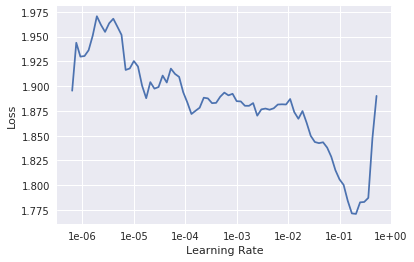

In [21]:
learn.lr_find()
learn.recorder.plot(skip_end=15)

In [22]:
learn.fit_one_cycle(5, 5e-3)

Total time: 00:29
epoch  train_loss  valid_loss
1      0.912590    0.924594    (00:05)
2      0.858932    0.875894    (00:05)
3      0.795899    0.844708    (00:05)
4      0.653760    0.815160    (00:06)
5      0.579931    0.816580    (00:05)



In [23]:
np.sqrt(0.812)

0.9011104260855048

In [24]:
learn.save('dotprod')

Here's [some benchmarks](https://www.librec.net/release/v1.3/example.html) on the same dataset for the popular Librec system for collaborative filtering. They show best results based on RMSE of 0.91, which corresponds to an MSE of `0.91**2 = 0.83`.

# Interpretation

## Setup

In [25]:
learn.load('dotprod');

In [26]:
learn.model

EmbeddingDotBias(
  (u_weight): Embedding(944, 40)
  (i_weight): Embedding(1654, 40)
  (u_bias): Embedding(944, 1)
  (i_bias): Embedding(1654, 1)
)

In [27]:
rating_movie.userId.nunique(), rating_movie.title.nunique()

(943, 1664)

In [28]:
# Get the top 1000 movies by number of ratings.
g = rating_movie.groupby(title)['rating'].count()
top_movies = g.sort_values(ascending=False).index.values[:1000]
top_movies[:10]

array(['Star Wars (1977)', 'Contact (1997)', 'Fargo (1996)', 'Return of the Jedi (1983)', 'Liar Liar (1997)',
       'English Patient, The (1996)', 'Scream (1996)', 'Toy Story (1995)', 'Air Force One (1997)',
       'Independence Day (ID4) (1996)'], dtype=object)

### Movie bias

In [29]:
# In collaborative filtering setting, we use the terms user and item
# Even if the task has not item per se. For example, item here is movie
movie_bias = learn.bias(top_movies, is_item=True)
movie_bias.shape

torch.Size([1000])

In [30]:
# Get the average rating per movie and then zip it with the bias
# and the title of the movie
mean_ratings = np.round(rating_movie.groupby(title)['rating'].mean(), 2)
movie_ratings = [(bias, movie, mean_ratings.loc[movie])
                 for movie, bias in zip(top_movies, movie_bias)]
movie_ratings[:5]

[(tensor(0.5301), 'Star Wars (1977)', 4.36),
 (tensor(0.3982), 'Contact (1997)', 3.8),
 (tensor(0.3604), 'Fargo (1996)', 4.16),
 (tensor(0.3840), 'Return of the Jedi (1983)', 4.01),
 (tensor(0.0995), 'Liar Liar (1997)', 3.16)]

In [31]:
# Sort by bias
sorted(movie_ratings, key=lambda x:x[0])[:15]

[(tensor(-0.3742), 'Children of the Corn: The Gathering (1996)', 1.32),
 (tensor(-0.2946), 'Striptease (1996)', 2.24),
 (tensor(-0.2923), 'Lawnmower Man 2: Beyond Cyberspace (1996)', 1.71),
 (tensor(-0.2865), 'Mortal Kombat: Annihilation (1997)', 1.95),
 (tensor(-0.2851), 'Crow: City of Angels, The (1996)', 1.95),
 (tensor(-0.2804), 'Cable Guy, The (1996)', 2.34),
 (tensor(-0.2428), 'Island of Dr. Moreau, The (1996)', 2.16),
 (tensor(-0.2390), "Stephen King's The Langoliers (1995)", 2.41),
 (tensor(-0.2358), 'Barb Wire (1996)', 1.93),
 (tensor(-0.2292), 'Showgirls (1995)', 1.96),
 (tensor(-0.2256), "McHale's Navy (1997)", 2.19),
 (tensor(-0.2131), "Joe's Apartment (1996)", 2.24),
 (tensor(-0.2120), 'Bio-Dome (1996)', 1.9),
 (tensor(-0.2063), 'Grease 2 (1982)', 2.0),
 (tensor(-0.2046), 'Beverly Hills Ninja (1997)', 2.31)]

In [32]:
sorted(movie_ratings, key=lambda x:x[0], reverse=True)[:15]

[(tensor(0.6305), "Schindler's List (1993)", 4.47),
 (tensor(0.5727), 'Titanic (1997)', 4.25),
 (tensor(0.5499), 'Shawshank Redemption, The (1994)', 4.45),
 (tensor(0.5301), 'Star Wars (1977)', 4.36),
 (tensor(0.5209), 'Rear Window (1954)', 4.39),
 (tensor(0.5202), 'Silence of the Lambs, The (1991)', 4.29),
 (tensor(0.5143), 'L.A. Confidential (1997)', 4.16),
 (tensor(0.4969), 'Casablanca (1942)', 4.46),
 (tensor(0.4902), 'Vertigo (1958)', 4.25),
 (tensor(0.4874), 'As Good As It Gets (1997)', 4.2),
 (tensor(0.4800), 'Close Shave, A (1995)', 4.49),
 (tensor(0.4697), 'Boot, Das (1981)', 4.2),
 (tensor(0.4510), 'Godfather, The (1972)', 4.28),
 (tensor(0.4492), 'To Kill a Mockingbird (1962)', 4.29),
 (tensor(0.4471), 'Good Will Hunting (1997)', 4.26)]

### Movie weights

We'll be looking at the same top 1000 movies used above.

In [33]:
movie_w = learn.weight(top_movies, is_item=True)
movie_w.shape

torch.Size([1000, 40])

The width of the embedding is 40 which is the latent space it tries to learn for each movie.

In [34]:
# We will use PCA for dimensionally reduction to project each movie
# from space of dimension 40 to 3-D so that it is easier to explore
movie_pca = movie_w.pca(3)
movie_pca.shape

torch.Size([1000, 3])

In [35]:
# We're getting the three factors (principal components) 
fac0, fac1, fac2 = movie_pca.t()
fac0.shape, fac1.shape, fac2.shape, 

(torch.Size([1000]), torch.Size([1000]), torch.Size([1000]))

## Factor 1

In [36]:
movie_comp = [(fac, movie) for fac, movie in zip(fac0, top_movies)]
movie_comp[:5]

[(tensor(0.6762), 'Star Wars (1977)'),
 (tensor(0.0857), 'Contact (1997)'),
 (tensor(0.8924), 'Fargo (1996)'),
 (tensor(0.1245), 'Return of the Jedi (1983)'),
 (tensor(-0.6919), 'Liar Liar (1997)')]

In [37]:
sorted(movie_comp, key=itemgetter(0), reverse=True)[:10]

[(tensor(1.1014), 'Close Shave, A (1995)'),
 (tensor(1.0629), 'Casablanca (1942)'),
 (tensor(1.0365), 'Chinatown (1974)'),
 (tensor(1.0202), 'Wrong Trousers, The (1993)'),
 (tensor(1.0161), 'Lawrence of Arabia (1962)'),
 (tensor(1.0152), 'When We Were Kings (1996)'),
 (tensor(0.9556), 'Citizen Kane (1941)'),
 (tensor(0.9419), 'Third Man, The (1949)'),
 (tensor(0.9355), 'Apocalypse Now (1979)'),
 (tensor(0.9345), 'Godfather, The (1972)')]

In [38]:
sorted(movie_comp, key=itemgetter(0))[:10]

[(tensor(-1.2971), 'Home Alone 3 (1997)'),
 (tensor(-1.2655), 'Jungle2Jungle (1997)'),
 (tensor(-1.1870), "McHale's Navy (1997)"),
 (tensor(-1.1660), 'Leave It to Beaver (1997)'),
 (tensor(-1.1426), 'Children of the Corn: The Gathering (1996)'),
 (tensor(-1.1366), 'Congo (1995)'),
 (tensor(-1.1327), 'D3: The Mighty Ducks (1996)'),
 (tensor(-1.0930), 'Mortal Kombat: Annihilation (1997)'),
 (tensor(-1.0802), 'Bio-Dome (1996)'),
 (tensor(-1.0300), 'Free Willy 3: The Rescue (1997)')]

## Factor 2

In [39]:
movie_comp = [(fac, movie) for fac, movie in zip(fac1, top_movies)]
movie_comp[:5]

[(tensor(-0.7993), 'Star Wars (1977)'),
 (tensor(-0.3382), 'Contact (1997)'),
 (tensor(0.2903), 'Fargo (1996)'),
 (tensor(-0.7876), 'Return of the Jedi (1983)'),
 (tensor(-0.4407), 'Liar Liar (1997)')]

In [40]:
sorted(movie_comp, key=itemgetter(0), reverse=True)[:10]

[(tensor(0.8657), 'Keys to Tulsa (1997)'),
 (tensor(0.8337), 'Ready to Wear (Pret-A-Porter) (1994)'),
 (tensor(0.8041), 'Trainspotting (1996)'),
 (tensor(0.7876), 'Cable Guy, The (1996)'),
 (tensor(0.7611), 'Jude (1996)'),
 (tensor(0.7591), 'Stupids, The (1996)'),
 (tensor(0.7485), 'Brazil (1985)'),
 (tensor(0.7430), 'Clockwork Orange, A (1971)'),
 (tensor(0.7422), 'Beavis and Butt-head Do America (1996)'),
 (tensor(0.7152), 'Very Brady Sequel, A (1996)')]

In [41]:
sorted(movie_comp, key=itemgetter(0))[:10]

[(tensor(-1.1707), 'Braveheart (1995)'),
 (tensor(-1.1070), 'Titanic (1997)'),
 (tensor(-1.0329), 'Raiders of the Lost Ark (1981)'),
 (tensor(-0.9263), 'Independence Day (ID4) (1996)'),
 (tensor(-0.8643), 'Pretty Woman (1990)'),
 (tensor(-0.8580), 'American President, The (1995)'),
 (tensor(-0.8571), 'Forrest Gump (1994)'),
 (tensor(-0.8439), "Mr. Holland's Opus (1995)"),
 (tensor(-0.8242), "It's a Wonderful Life (1946)"),
 (tensor(-0.8011), 'Time to Kill, A (1996)')]

# Plot learned weights

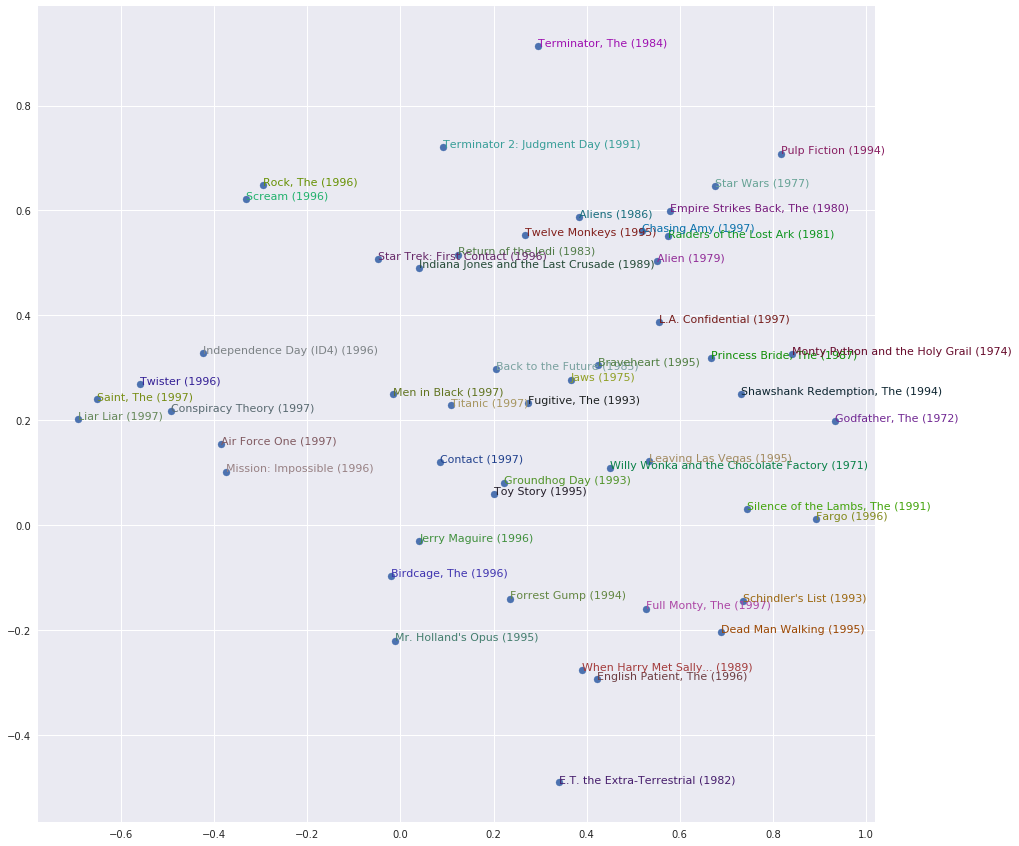

In [42]:
idxs = list(range(50))
X = fac0[idxs]
Y = fac2[idxs]
plt.figure(figsize=(15,15))
plt.scatter(X, Y)
for i, x, y in zip(top_movies[idxs], X, Y):
    plt.text(x,y,i, color=np.random.rand(3)*0.7, fontsize=11)
plt.show()

In [48]:
dl = iter(data.train_dl)

In [51]:
o = dl.__next__()

In [55]:
o[0][0].size()

torch.Size([64])

```python
class EmbeddingDotBias(nn.Module):
    "Base model for callaborative filtering."
    def __init__(self, n_factors:int, n_users:int, n_items:int,
                 y_range:Tuple[float,float]=None):
        super().__init__()
        self.y_range = y_range
        # Each user will have a bias and each movie will also have a bias.
        (self.u_weight, self.i_weight, self.u_bias, self.i_bias) = \
            [embedding(*o) for o in [(n_users, n_factors),
                                     (n_items, n_factors), (n_users,1), (n_items,1)
        ]]

    def forward(self, users:LongTensor, items:LongTensor) -> Tensor:
        # users and items will tensors that hold the indices that will be used
        # look up their values from the embedding matrics.
        # dot is element-wise product of the embeddings of users and items
        dot = self.u_weight(users)* self.i_weight(items)
        # Then sum the dot which will be dot product of the user values and item
        # values from embedding matrics
        # We also add the bias for each user and item
        res = dot.sum(1) + self.u_bias(users).squeeze() + self.i_bias(items).squeeze()
        if self.y_range is None: return res
        return torch.sigmoid(res) * (self.y_range[1]-self.y_range[0]) + self.y_range[0]
```

```python
def collab_learner(data, n_factors:int=None, use_nn:bool=False, metrics=None,
                   emb_szs:Dict[str,int]=None, wd:float=0.01, **kwargs)->Learner:
    "Create a Learner for collaborative filtering."
    emb_szs = data.get_emb_szs(ifnone(emb_szs, {}))
    u, m = data.classes.values()
    if use_nn: model = EmbeddingNN(emb_szs=emb_szs, **kwargs)
    else:      model = EmbeddingDotBias(n_factors, len(u), len(m), **kwargs)
    return CollabLearner(data, model, metrics=metrics, wd=wd)
```

In [62]:
u, m, = data.classes.values()

In [68]:
u, len(u)

(array(['#na#', '1', '2', '3', ..., '940', '941', '942', '943'], dtype='<U21'),
 944)

In [70]:
m, len(m)

(array(['#na#', "'Til There Was You (1997)", '1-900 (1994)', '101 Dalmatians (1996)', ...,
        "Young Poisoner's Handbook, The (1995)", 'Zeus and Roxanne (1997)', 'unknown',
        'Á köldum klaka (Cold Fever) (1994)'], dtype=object), 1654)

In [71]:
rating_movie.userId.nunique(), rating_movie.title.nunique()

(943, 1664)